**Importing Needed packages**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r'creditcard.csv')


In [ ]:
# dataset exploring
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
data.shape
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,...,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,93496.229018,0.026535,0.036888,0.001683,-0.009920,-0.035243,0.010202,-0.015763,0.017406,-0.026416,...,0.011313,-0.007422,-0.002441,0.004731,0.006325,-0.003914,0.003220,0.002745,88.300313,0.001067
std,47078.414315,1.821169,1.463114,1.542649,1.396927,1.325419,1.278059,1.191338,1.113649,1.081769,...,0.732830,0.701007,0.448814,0.598876,0.503256,0.473621,0.349162,0.283943,226.491008,0.032651
min,16.000000,-22.382092,-14.198653,-22.801238,-4.509231,-14.898113,-9.014296,-28.011293,-14.272909,-8.960922,...,-8.954836,-3.685480,-4.659394,-2.155474,-2.888726,-1.411300,-4.126746,-8.277924,0.000000,0.000000
25%,54105.000000,-0.910851,-0.591410,-0.923906,-0.853177,-0.707835,-0.753097,-0.566989,-0.201289,-0.651131,...,-0.215450,-0.547315,-0.170047,-0.358548,-0.308047,-0.321703,-0.064955,-0.051968,5.947500,0.000000
50%,82747.500000,0.030829,0.084125,0.198424,-0.040529,-0.068919,-0.264226,0.020956,0.031757,-0.069638,...,-0.033285,0.006427,-0.016030,0.041406,0.017555,-0.066024,0.005012,0.012332,20.620000,0.000000
75%,138360.250000,1.306062,0.796877,1.069414,0.752547,0.588138,0.388645,0.573145,0.323913,0.569575,...,0.181906,0.501251,0.140974,0.433512,0.360168,0.218691,0.096316,0.076824,76.292500,0.000000
max,169929.000000,2.360330,14.706335,3.486492,12.114672,12.116322,7.804425,12.164068,8.438878,9.077107,...,13.115579,3.488780,4.655025,3.633399,1.945840,2.400858,4.591214,5.678671,4337.000000,1.000000


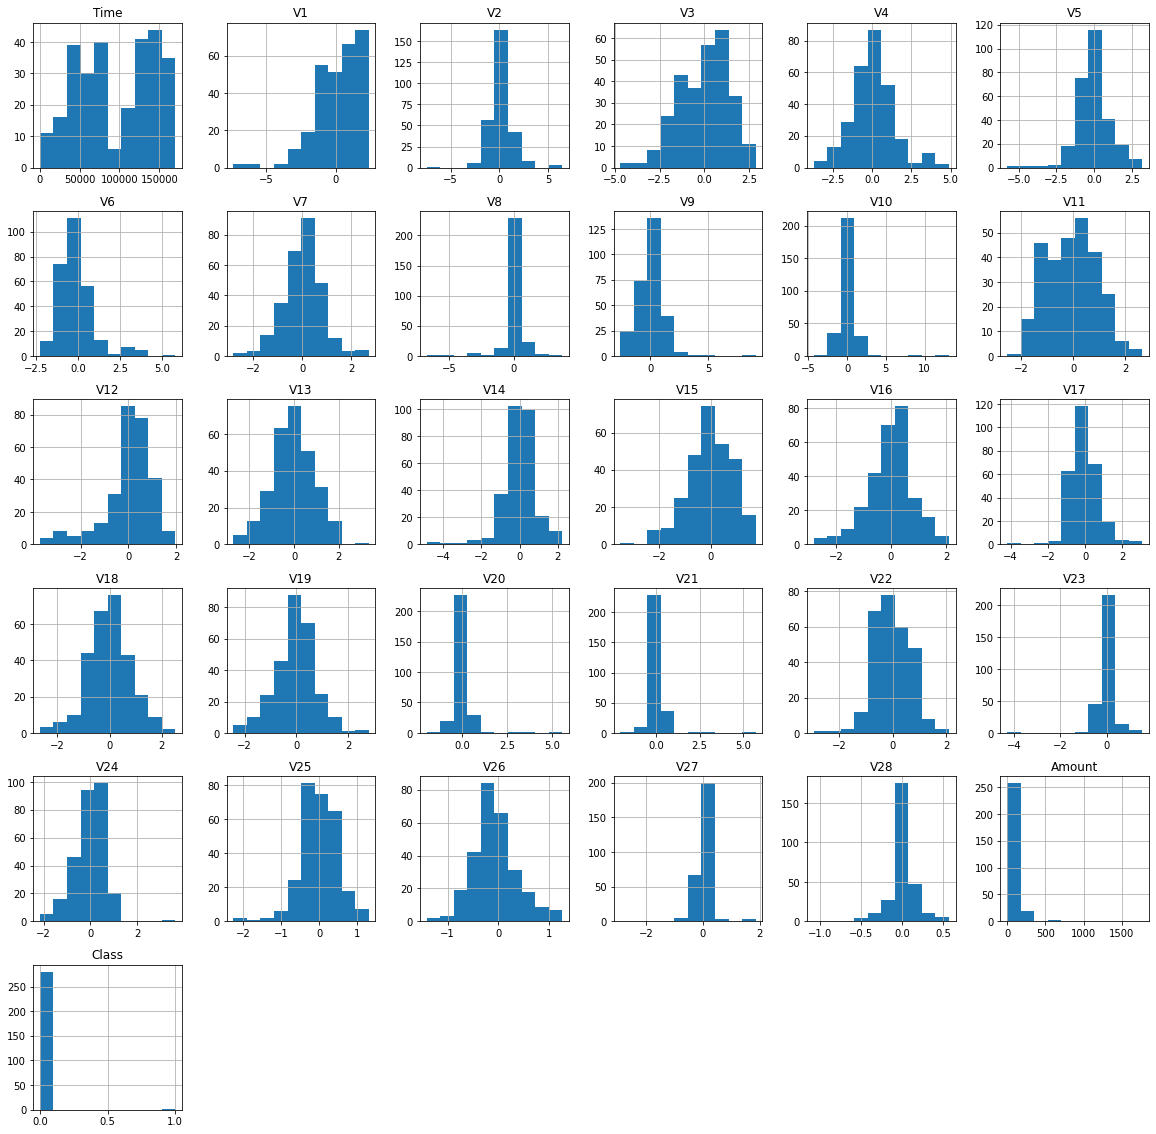

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0035714285714285713
Fraud Cases: 1
Valid Transactions: 280


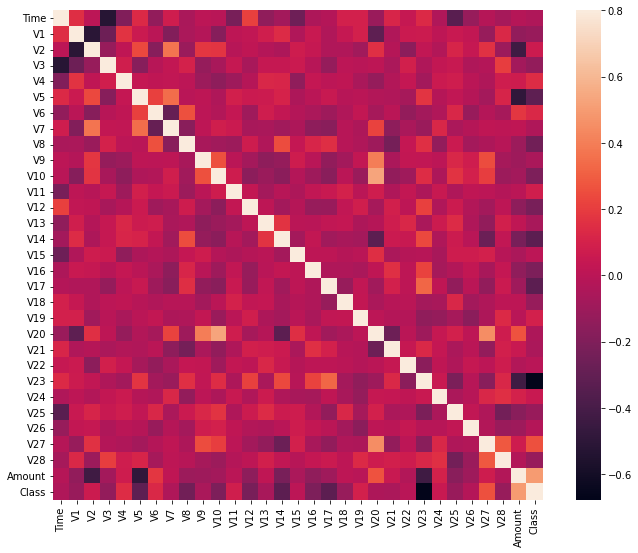

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

In [ ]:
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

In [ ]:
# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

In [ ]:
# Print shapes
print(X.shape)
print(Y.shape)

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

(281, 30)
(281,)


In [ ]:
# define random states
state = 1

In [ ]:
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
    
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 648x504 with 0 Axes>

In [ ]:
# Run classification metrics
print('{}: {}'.format(clf_name, n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Local Outlier Factor: 2
0.9928825622775801
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       280
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       281
   macro avg       0.50      0.50      0.50       281
weighted avg       0.99      0.99      0.99       281

